<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/BJ/17086_%EC%95%84%EA%B8%B0%EC%83%81%EC%96%B42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아기상어

N×M 크기의 공간에 아기 상어 여러 마리가 있다. 공간은 1×1 크기의 정사각형 칸으로 나누어져 있다. 한 칸에는 아기 상어가 최대 1마리 존재한다.

어떤 칸의 안전 거리는 그 칸과 가장 거리가 가까운 아기 상어와의 거리이다. 두 칸의 거리는 하나의 칸에서 다른 칸으로 가기 위해서 지나야 하는 칸의 수이고, 이동은 인접한 8방향(대각선 포함)이 가능하다.

안전 거리가 가장 큰 칸을 구해보자.

## 입력 출력 및 예제


* 입력

첫째 줄에 공간의 크기 N과 M(2 ≤ N, M ≤ 50)이 주어진다. 둘째 줄부터 N개의 줄에 공간의 상태가 주어지며, 0은 빈 칸, 1은 아기 상어가 있는 칸이다. 빈 칸과 상어의 수가 각각 한 개 이상인 입력만 주어진다.

* 출력

첫째 줄에 안전 거리의 최댓값을 출력한다.

* 예제

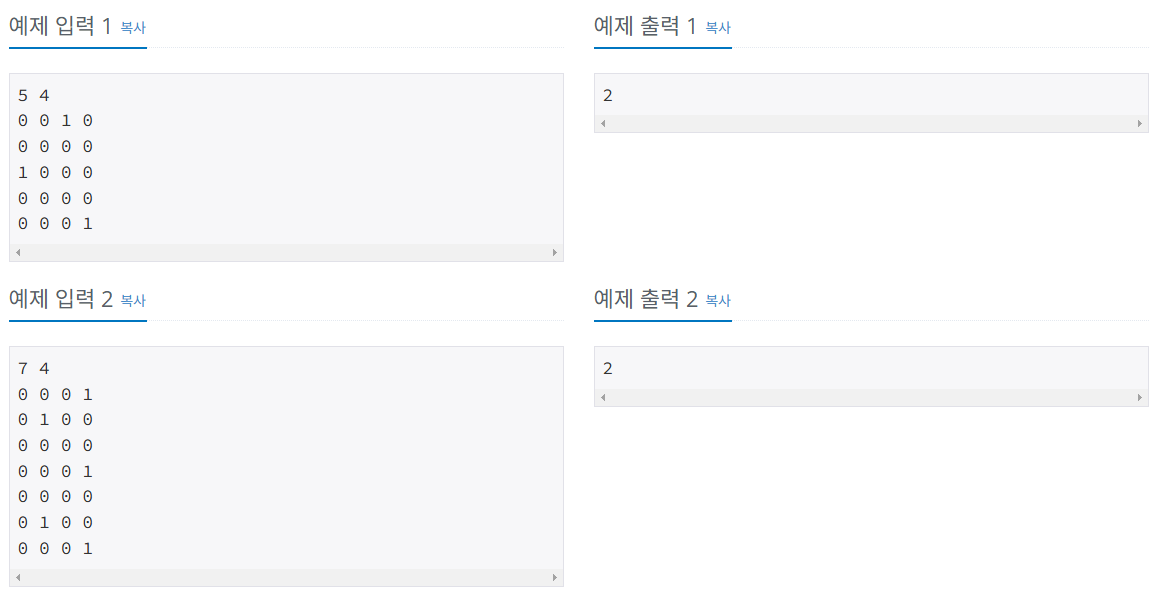

## 구상

- 상어에서 최대한 멀리 떨어져 있는 곳을 찾아 그 거리를 구하는 문제
- DFS로 접근하면 될 듯하다

## 코드

In [ ]:
from collections import deque

# 입력 받기
N, M = map(int, input().split())
graph = [list(map(int, input().split())) for _ in range(N)]

# 8방향 이동 (상, 하, 좌, 우, 대각선)
directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

# BFS를 위한 큐 생성
queue = deque()

# 상어가 있는 곳을 큐에 추가 (초기 상태)
for i in range(N):
    for j in range(M):
        if graph[i][j] == 1:
            queue.append((i, j))

# BFS 실행
while queue:
    x, y = queue.popleft()
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < N and 0 <= ny < M and graph[nx][ny] == 0:
            graph[nx][ny] = graph[x][y] + 1  # 거리 업데이트
            queue.append((nx, ny))

# 최댓값 찾기 (초기 상어 위치는 1이므로 1 빼줌)
max_distance = max(max(row) for row in graph) - 1
print(max_distance)

## 메모

* 처음 DFS로 접근했다가 BFS 방식으로 바꾸었다. DFS로 접근 시 백트래킹이 과도하게 발생하는 단점이 있다
* 상어 위치를 기준으로 BFS 방식으로 하는 것이 좋았다.